In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Flatten, Dense, Dropout
import warnings

sns.set()
%matplotlib inline
warnings.filterwarnings("ignore")

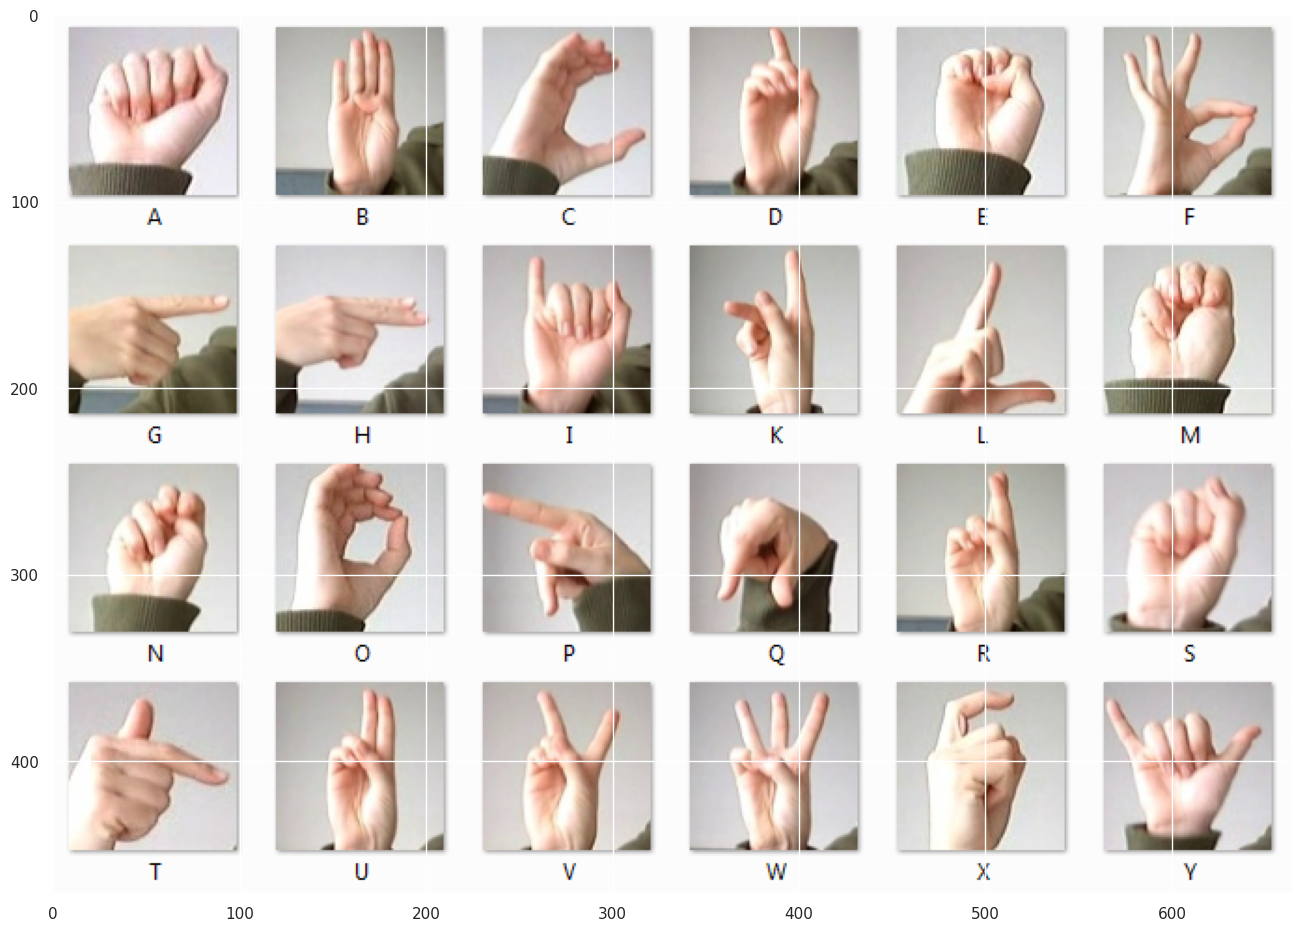

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,16))
img = plt.imread('/content/drive/MyDrive/Sign Language Classification /Sign Language Dataset/amer_sign2.png')
plt.imshow(img)
plt.show()

In [4]:
df_train = pd.read_csv('/content/drive/MyDrive/Sign Language Classification /Sign Language Dataset/sign_mnist_train.csv')
df_train.head(-5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27445,14,167,169,170,171,171,172,172,172,171,...,215,215,211,208,211,201,167,119,75,48
27446,19,133,135,138,141,143,144,144,145,145,...,0,0,1,4,4,0,0,0,0,0
27447,11,170,172,175,177,179,182,185,186,187,...,221,228,229,228,229,229,227,228,227,227
27448,12,149,151,153,157,159,161,164,165,168,...,108,165,167,163,159,153,147,148,139,196


In [5]:
df_test = pd.read_csv('/content/drive/MyDrive/Sign Language Classification /Sign Language Dataset/sign_mnist_test.csv')
df_test.head(-5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7162,10,130,131,131,134,133,135,137,136,136,...,128,106,107,63,11,147,194,182,176,124
7163,4,158,161,165,169,172,175,177,179,181,...,78,122,141,141,141,140,141,142,143,144
7164,14,141,144,146,149,153,156,158,161,161,...,199,203,202,201,201,201,200,200,201,201
7165,8,158,160,160,161,161,161,164,162,162,...,177,178,176,174,173,172,171,169,169,167


In [6]:
y_train = df_train['label']
df_train.drop(['label'], axis=1, inplace=True)
df_train.head(-5)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27445,167,169,170,171,171,172,172,172,171,172,...,215,215,211,208,211,201,167,119,75,48
27446,133,135,138,141,143,144,144,145,145,145,...,0,0,1,4,4,0,0,0,0,0
27447,170,172,175,177,179,182,185,186,187,188,...,221,228,229,228,229,229,227,228,227,227
27448,149,151,153,157,159,161,164,165,168,171,...,108,165,167,163,159,153,147,148,139,196


In [7]:
y_test = df_test['label']
df_test.drop(['label'], axis=1, inplace=True)
df_test.head(-5)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7162,130,131,131,134,133,135,137,136,136,137,...,128,106,107,63,11,147,194,182,176,124
7163,158,161,165,169,172,175,177,179,181,184,...,78,122,141,141,141,140,141,142,143,144
7164,141,144,146,149,153,156,158,161,161,161,...,199,203,202,201,201,201,200,200,201,201
7165,158,160,160,161,161,161,164,162,162,161,...,177,178,176,174,173,172,171,169,169,167


In [8]:
size  = 28
channels = 1
batch = 128
epochs = 50

In [9]:
X_train = df_train.values.reshape(df_train.shape[0], size, size, channels)
X_test = df_test.values.reshape(df_test.shape[0], size, size, channels)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (27455, 28, 28, 1)
X_test shape: (7172, 28, 28, 1)


In [10]:
datagen = ImageDataGenerator(rescale=1./255,
                             zoom_range=0.2,
                             width_shift_range=.2, height_shift_range=.2,
                             rotation_range=30,
                             brightness_range=[0.8, 1.2],
                             horizontal_flip=True)

datagenRescale = ImageDataGenerator(rescale=1./255)

X_train = datagen.flow(X_train, y_train, batch_size=batch)

X_test = datagenRescale.flow(X_test, y_test)

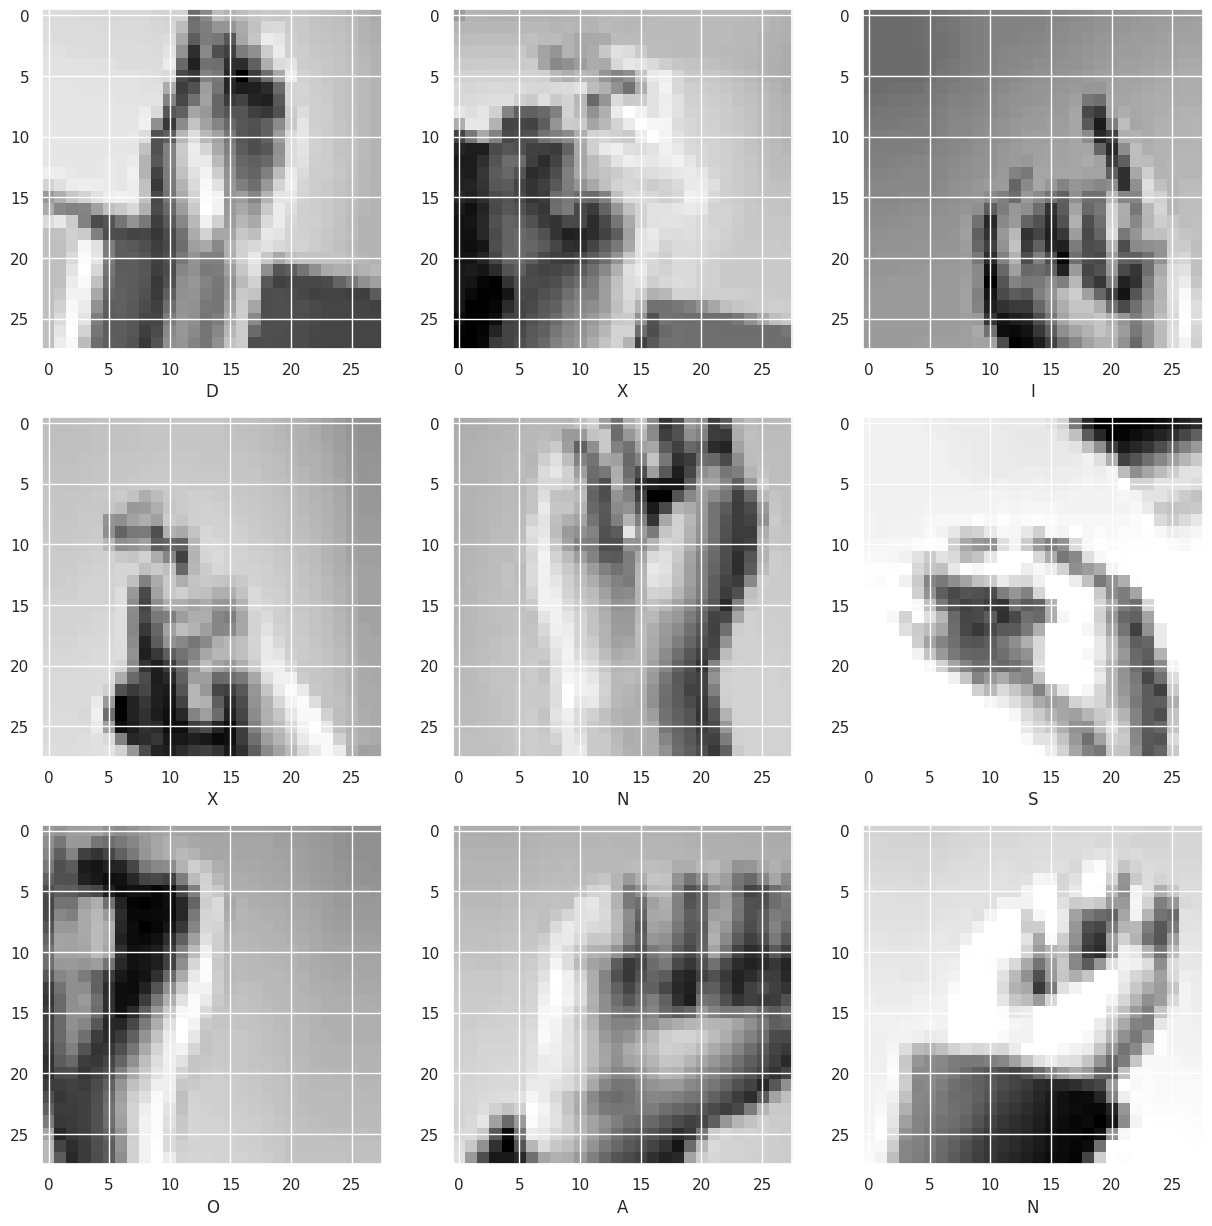

In [11]:
alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i+1)
    for X_batch, Y_batch in X_train:
        image = X_batch[i]
        plt.imshow(image, cmap='gray')
        plt.xlabel(alphabet[Y_batch[i]])
        break
plt.show()

In [12]:
checkpoint_filepath = 'best_model.hdf5'

callback_checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=False, monitor='val_accuracy', mode='max', save_best_only=True)
callback_learningrate = ReduceLROnPlateau(monitor='loss', mode='min', min_delta=0.01, patience=3, factor=.75, min_lr=0.00001, verbose=1)

callbacks = [callback_checkpoint, callback_learningrate]

In [13]:
Model = Sequential([Conv2D(filters=32,  kernel_size=(3,3), activation="relu", input_shape=(size,size,channels)),
                    MaxPool2D(2,2, padding='same'),
                    Dropout(0.2),

                    Conv2D(filters=128,  kernel_size=(3,3), activation="relu"),
                    MaxPool2D(2,2, padding='same'),
                    Dropout(0.2),

                    Conv2D(filters=512, kernel_size=(3,3), activation="relu"),
                    MaxPool2D(2,2, padding='same'),
                    Dropout(0.2),


                    Flatten(),

                    Dense(units=4096, activation="relu"),
                    Dropout(0.2),

                    Dense(units=1024, activation="relu"),
                    Dropout(0.2),

                    Dense(units=256, activation="relu"),
                    Dropout(0.2),

                    Dense(units=25, activation="softmax"),
])


Model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])


Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 128)         0

In [14]:
history = Model.fit(X_train, validation_data=X_test, epochs=10, callbacks=callbacks)

Epoch 1/10
215/215 [==============================] - 279s 1s/step - loss: 3.0722 - accuracy: 0.0640 - val_loss: 2.8353 - val_accuracy: 0.0844 - lr: 0.0010
Epoch 2/10
215/215 [==============================] - 264s 1s/step - loss: 2.4857 - accuracy: 0.1926 - val_loss: 1.7265 - val_accuracy: 0.3370 - lr: 0.0010
Epoch 3/10
215/215 [==============================] - 254s 1s/step - loss: 1.7286 - accuracy: 0.4008 - val_loss: 0.9448 - val_accuracy: 0.6527 - lr: 0.0010
Epoch 4/10
215/215 [==============================] - 250s 1s/step - loss: 1.2950 - accuracy: 0.5463 - val_loss: 0.6087 - val_accuracy: 0.7928 - lr: 0.0010
Epoch 5/10
215/215 [==============================] - 262s 1s/step - loss: 1.0091 - accuracy: 0.6438 - val_loss: 0.4456 - val_accuracy: 0.8560 - lr: 0.0010
Epoch 6/10
215/215 [==============================] - 255s 1s/step - loss: 0.8338 - accuracy: 0.7061 - val_loss: 0.4205 - val_accuracy: 0.8571 - lr: 0.0010
Epoch 7/10
215/215 [==============================] - 261s 1s/st

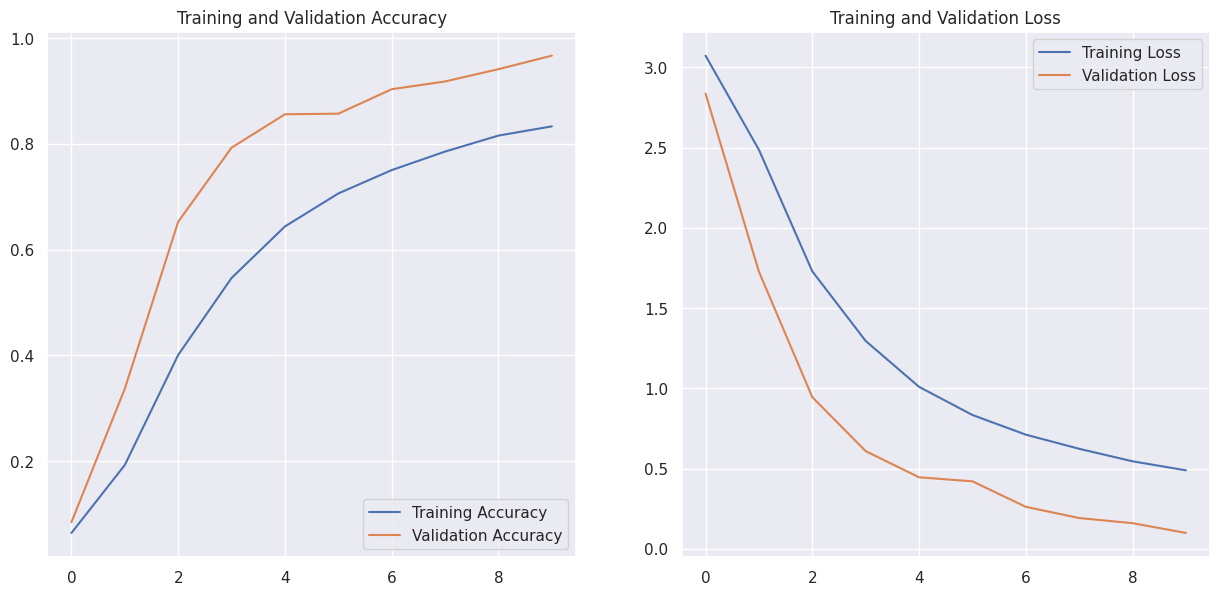

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
score = Model.evaluate(X_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

225/225 [==============================] - 14s 61ms/step - loss: 0.0989 - accuracy: 0.9668
Test loss: 0.09894159436225891
Test accuracy: 0.9668154120445251


In [18]:
df_test = pd.read_csv('/content/drive/MyDrive/Sign Language Classification /Sign Language Dataset/sign_mnist_test.csv')
y_test = df_test['label']
df_test.drop(['label'], axis=1, inplace=True)
X_test = df_test.values.reshape(df_test.shape[0], size, size, channels)

In [19]:
y_pred = np.argmax(Model.predict(X_test),axis = 1)

225/225 [==============================] - 26s 113ms/step


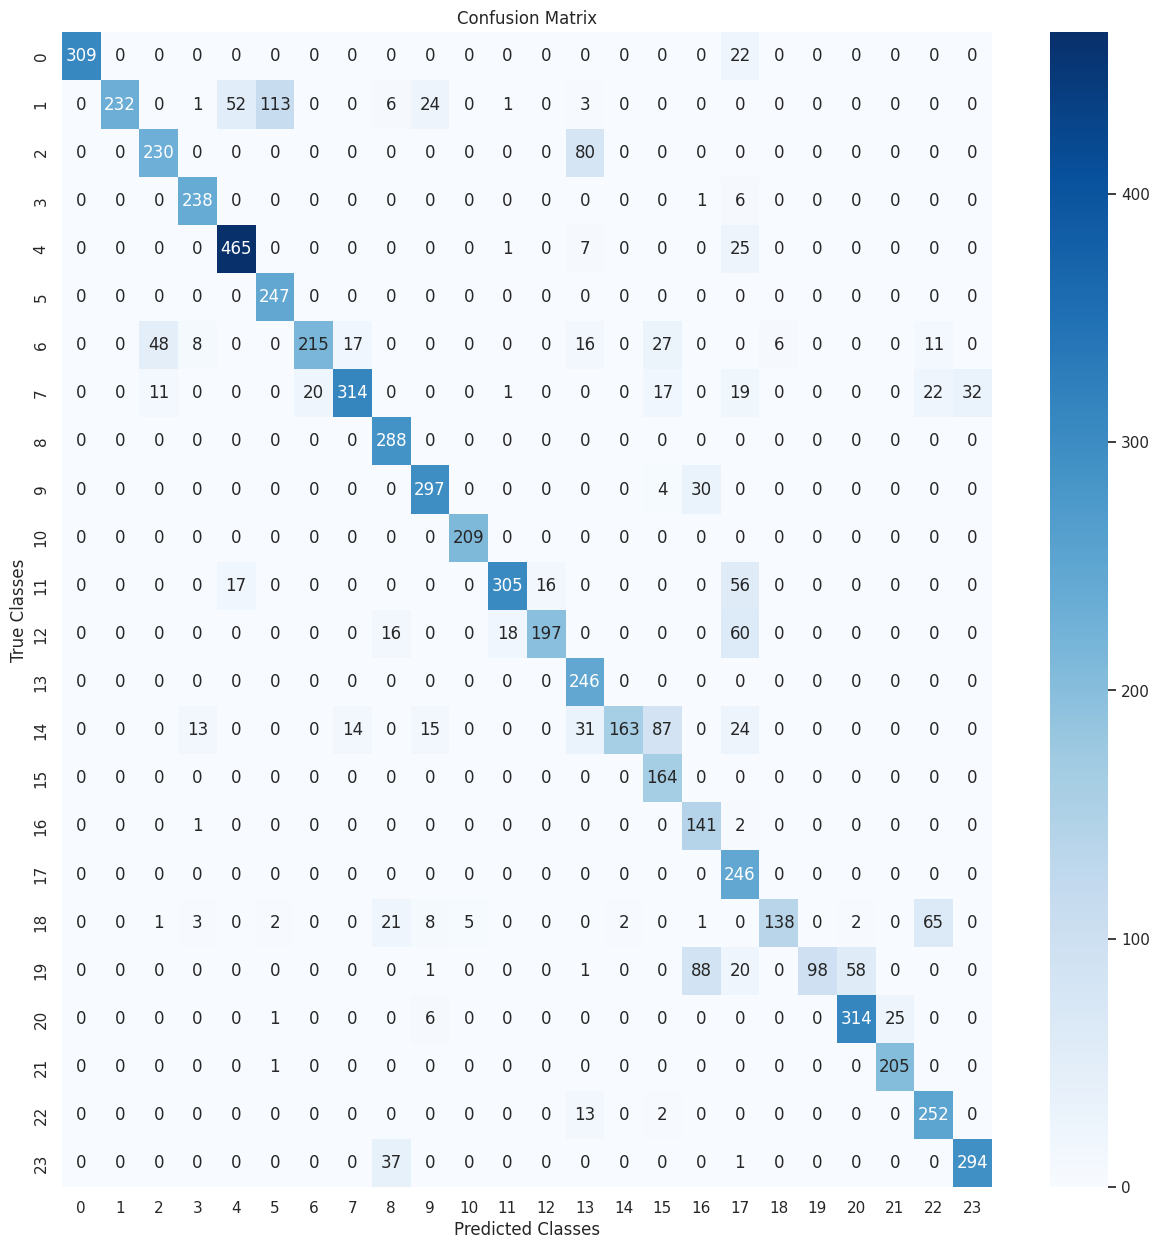

In [20]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (15,15))
sns.heatmap(CM, annot=True, cmap="Blues", fmt = 'g')
plt.xlabel("Predicted Classes")
plt.ylabel("True Classes")
plt.title("Confusion Matrix")
plt.show()

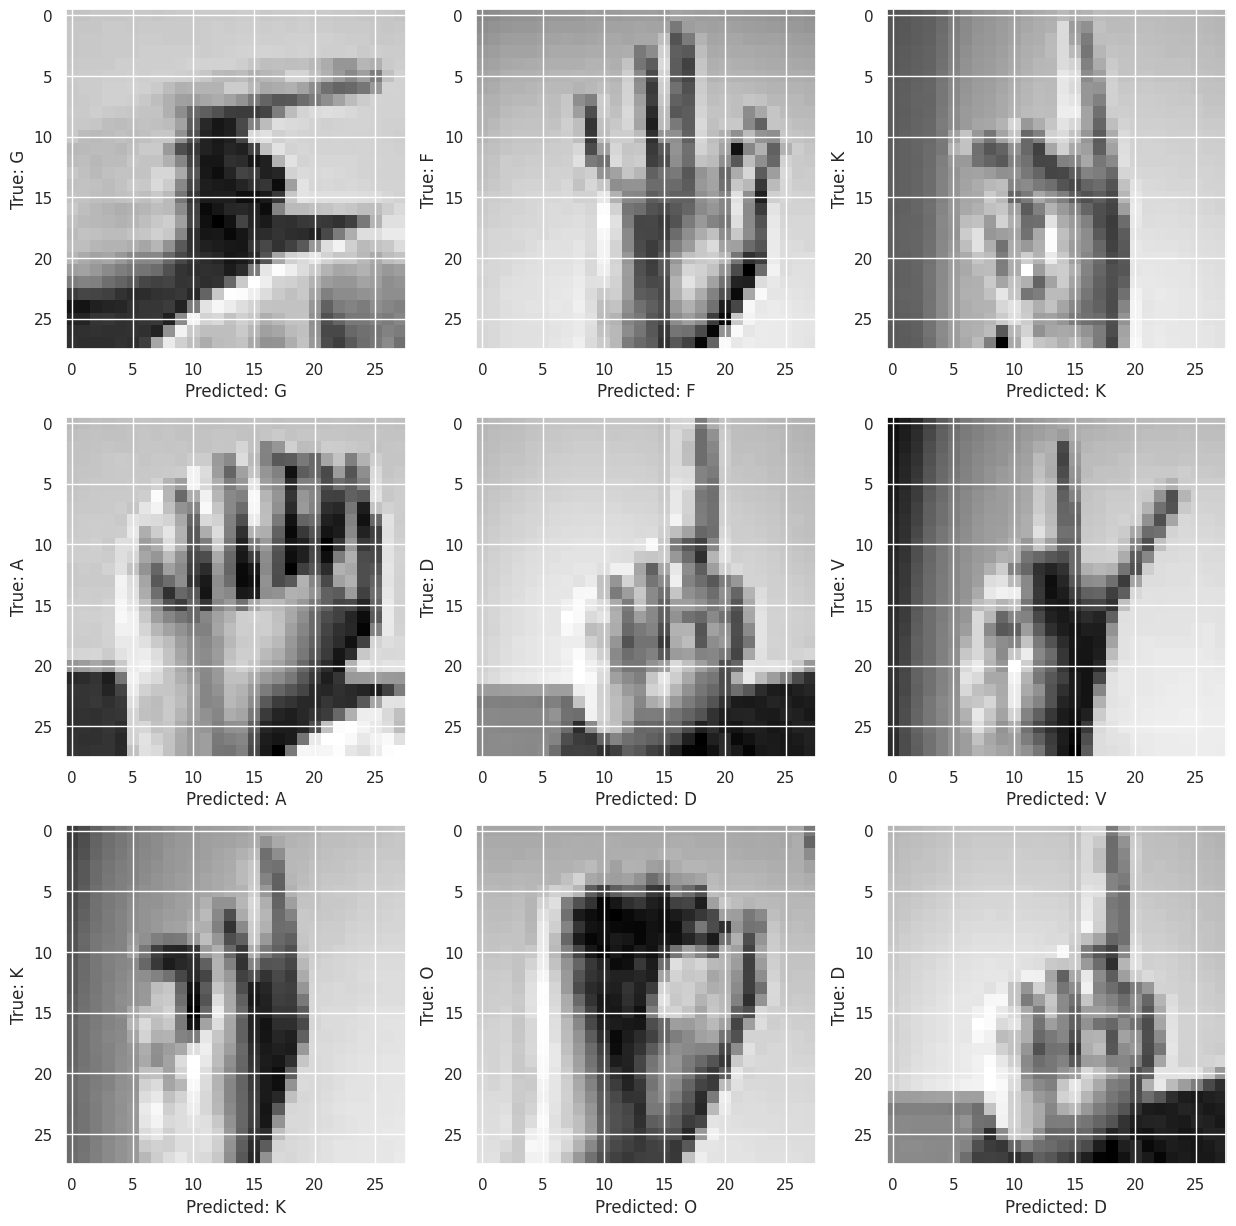

In [21]:
plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i],cmap='gray')
    plt.ylabel(f"True: {alphabet[y_test[i]]}")
    plt.xlabel(f"Predicted: {alphabet[y_pred[i]]}")

plt.show()